# Multivariate Linear Regression, Non-Parametric Models and Cross-Validation

**Author**: Christo Pananjickal Baby

**Course**: Applied Artificial Intelligence and Machine Learning

**Assignment**: Practical Lab 2

**Date**: 18-06-2025

Kindly run the code blocks in order or click run all.

In [1]:
from model_evaluator import ModelEvaluator
# Install required libraries
!pip install -r requirements.txt


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
# Importing Libraries
from sklearn.datasets import load_diabetes
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

## Part 1: Data Exploration and Preparation

In [3]:
# 1. Load the dataset
diabetes = load_diabetes()

# Convert to pandas DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Display the first few rows
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

+----+-------------+------------+------------+-------------+-------------+------------+-------------+-------------+-------------+-------------+----------+
|    |         age |        sex |        bmi |          bp |          s1 |         s2 |          s3 |          s4 |          s5 |          s6 |   target |
|----+-------------+------------+------------+-------------+-------------+------------+-------------+-------------+-------------+-------------+----------|
|  0 |  0.0380759  |  0.0506801 |  0.0616962 |  0.0218724  | -0.0442235  | -0.0348208 | -0.0434008  | -0.00259226 |  0.0199075  | -0.0176461  |      151 |
|  1 | -0.00188202 | -0.0446416 | -0.0514741 | -0.0263275  | -0.00844872 | -0.0191633 |  0.0744116  | -0.0394934  | -0.0683315  | -0.092204   |       75 |
|  2 |  0.0852989  |  0.0506801 |  0.0444512 | -0.00567042 | -0.0455995  | -0.0341945 | -0.0323559  | -0.00259226 |  0.00286131 | -0.0259303  |      141 |
|  3 | -0.0890629  | -0.0446416 | -0.011595  | -0.0366561  |  0.012190

2. Our objective is to predict the disease progression one year after baseline using patient features such as age, bmi, blood pressure and blood serum measurements. We have the target variable `target` which represents the disease progression.

In [4]:
# 3. Describe the data
print(tabulate(df.describe(), headers='keys', tablefmt='psql'))

+-------+---------------+---------------+---------------+---------------+--------------+---------------+---------------+---------------+---------------+---------------+----------+
|       |           age |           sex |           bmi |            bp |           s1 |            s2 |            s3 |            s4 |            s5 |            s6 |   target |
|-------+---------------+---------------+---------------+---------------+--------------+---------------+---------------+---------------+---------------+---------------+----------|
| count | 442           | 442           | 442           | 442           | 442          | 442           | 442           | 442           | 442           | 442           |  442     |
| mean  |  -2.51182e-19 |   1.23079e-17 |  -2.24556e-16 |  -4.79757e-17 |  -1.3815e-17 |   3.91843e-17 |  -5.77718e-18 |  -9.04254e-18 |   9.29372e-17 |   1.13032e-17 |  152.133 |
| std   |   0.047619    |   0.047619    |   0.047619    |   0.047619    |   0.047619   |   0.047619 

In [5]:
print(df.info()) # Display information about the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


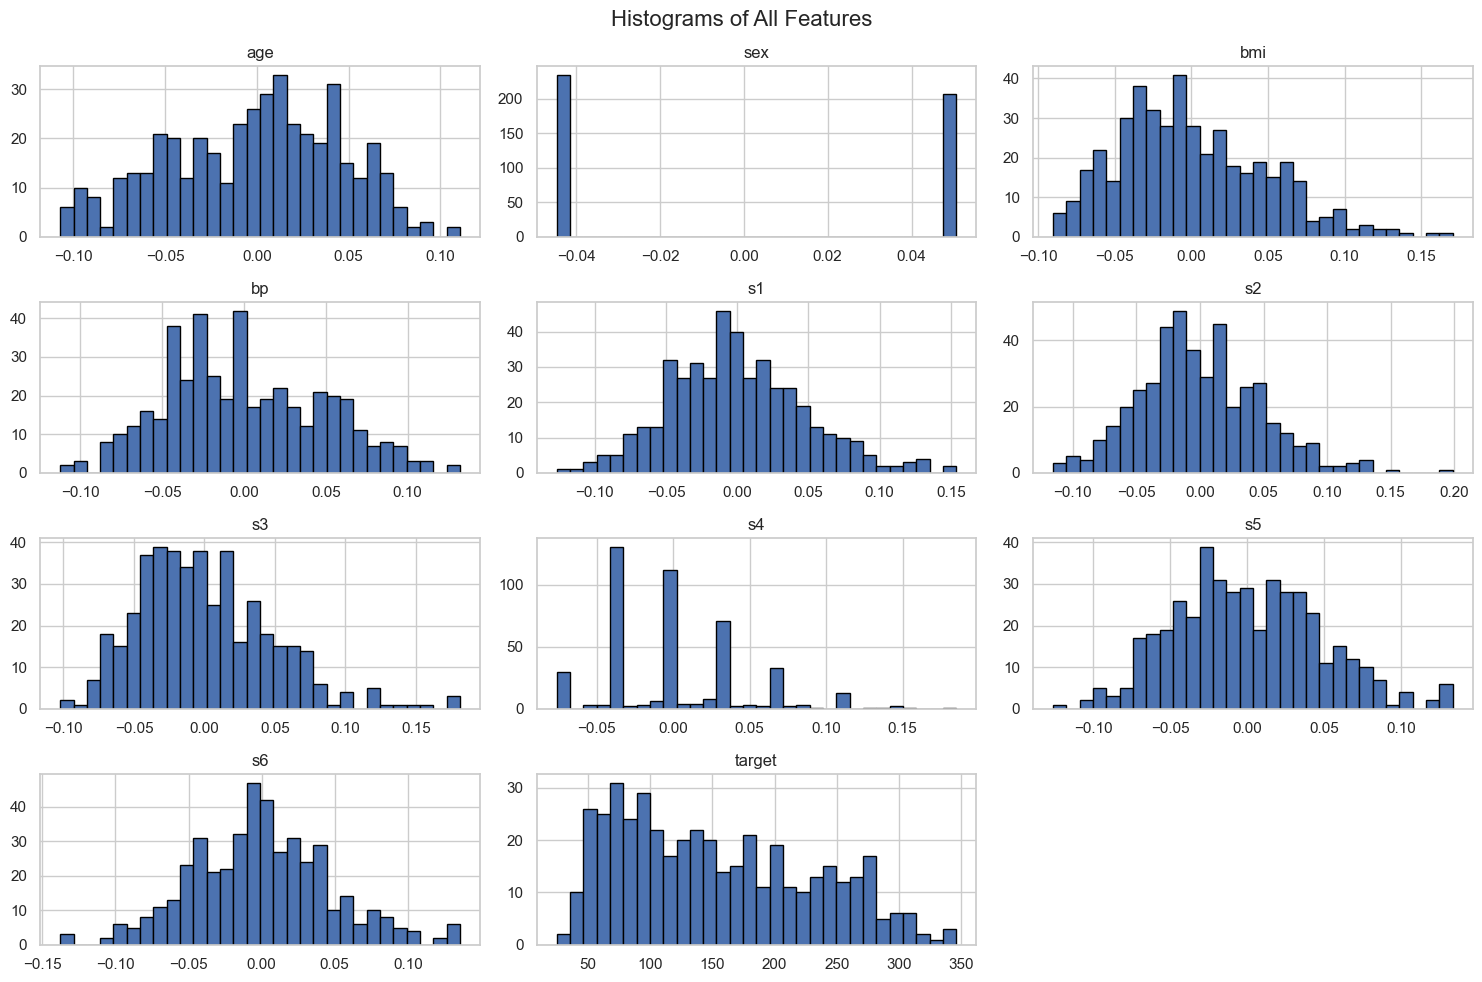

In [6]:
# Set style
sns.set_theme(style='whitegrid')

# Plot histograms for all columns
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of All Features", fontsize=16)
plt.tight_layout()
plt.show()

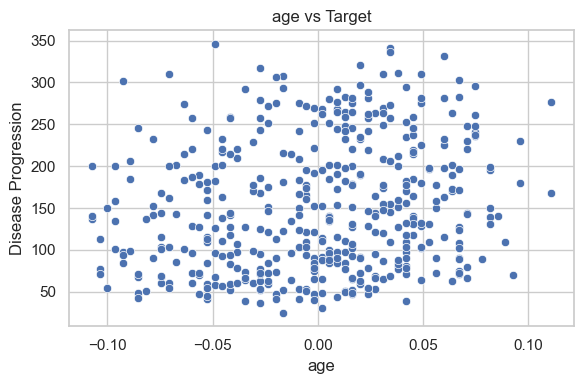

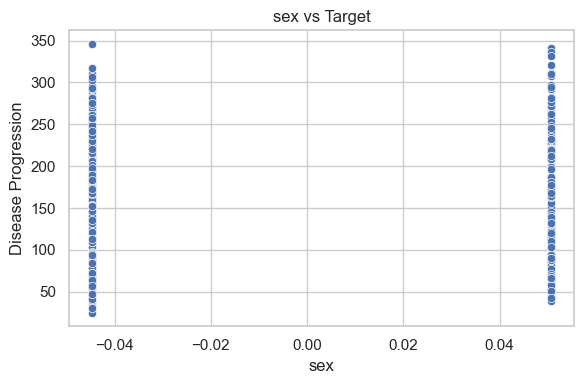

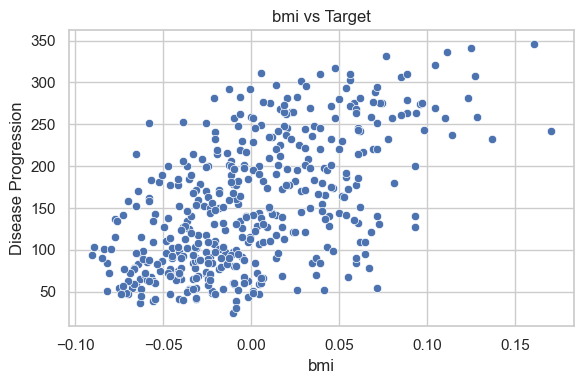

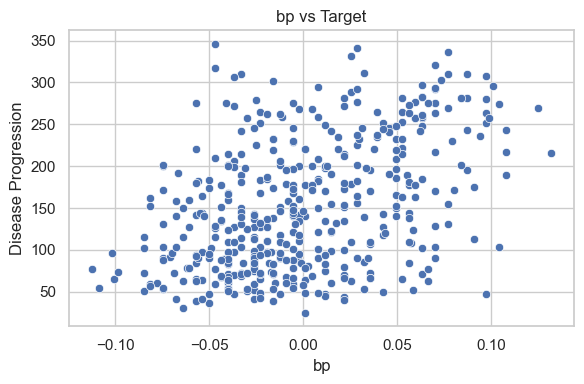

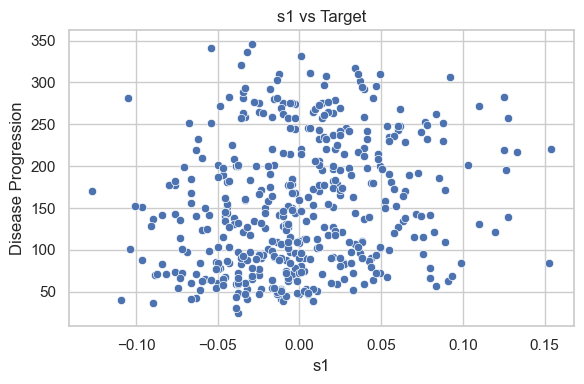

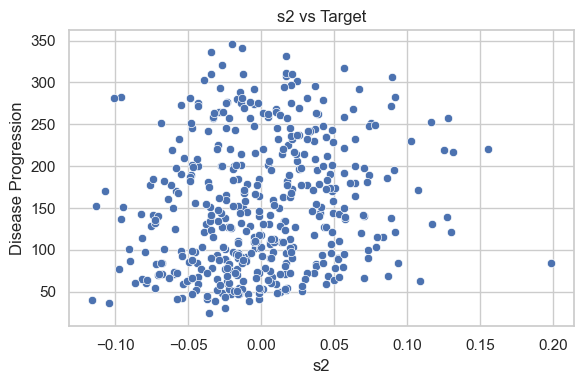

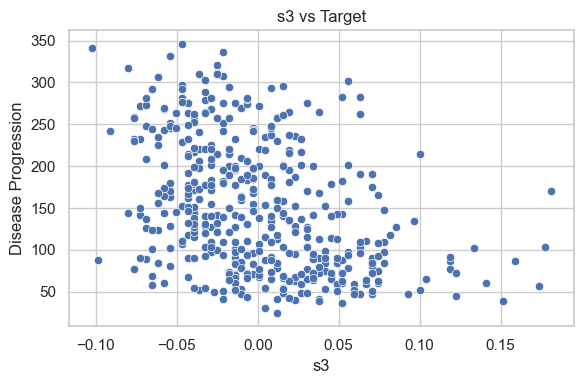

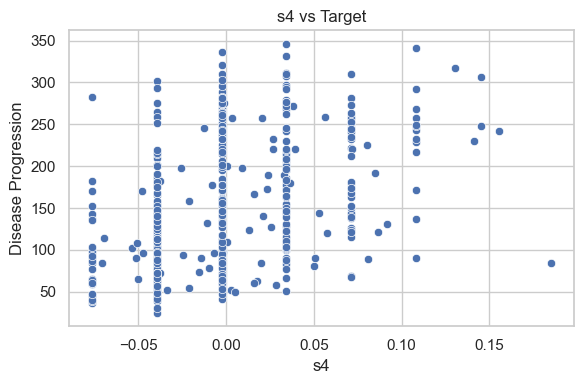

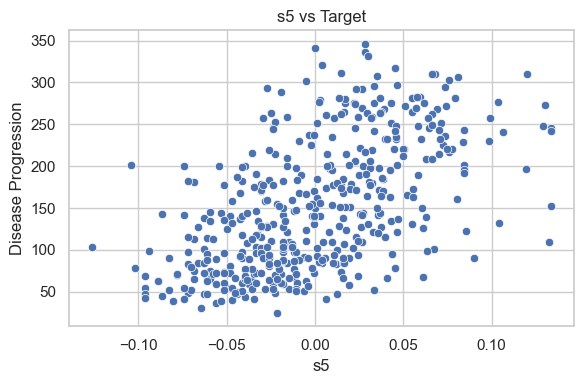

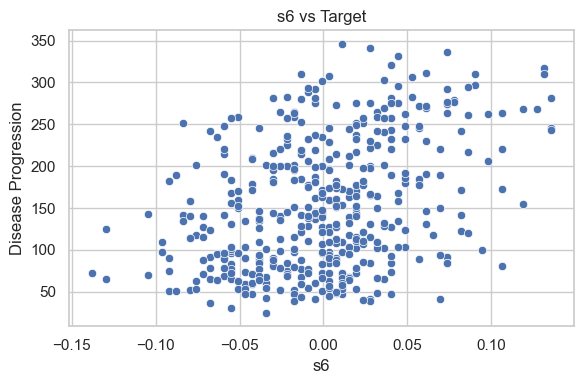

In [7]:
# Scatter plots of each feature vs target
for col in df.columns[:-1]:  # skip 'target'
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['target'])
    plt.title(f"{col} vs Target")
    plt.xlabel(col)
    plt.ylabel("Disease Progression")
    plt.tight_layout()
    plt.show()

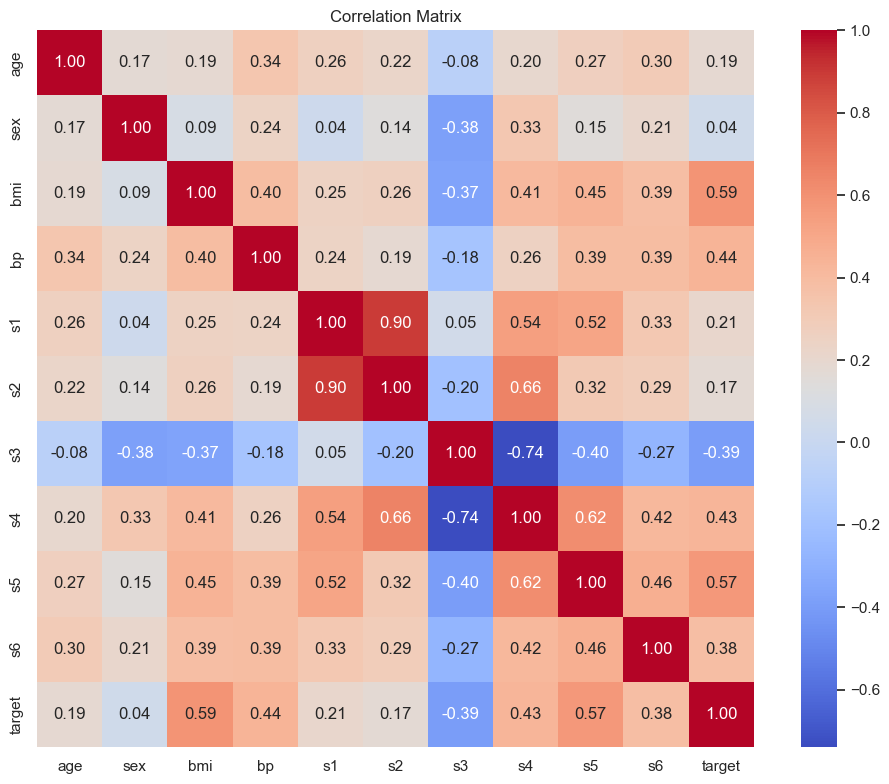

In [8]:
# Correlation matrix
corr = df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## Insights
- `bmi` has the strongest positive correlation with disease progression. High BMI is linked to worse diabetes outcomes.
- `s5` (a blood serum measurement related to cholesterol) is also strongly positively correlated with the target.
- `bp` and `s4` show moderate correlation with the target.
- `age`, `sex`, and `s1` to `s3` have weak or negligible correlation with disease progression.
- Data is standardized: feature means are near 0, standard deviations near 0.3 – 0.5.
- No obvious outliers or missing values in the dataset.


In [9]:
# 4. Clean the dataset

# Check for missing values
missing_values = df.isnull().sum()
print(tabulate(missing_values.to_frame('Missing Values'), headers='keys', tablefmt='psql'))

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

+--------+------------------+
|        |   Missing Values |
|--------+------------------|
| age    |                0 |
| sex    |                0 |
| bmi    |                0 |
| bp     |                0 |
| s1     |                0 |
| s2     |                0 |
| s3     |                0 |
| s4     |                0 |
| s5     |                0 |
| s6     |                0 |
| target |                0 |
+--------+------------------+
Number of duplicate rows: 0


From the above checks, we can see that there are no missing values or duplicate rows in the dataset. Therefore, no cleaning is required.

In [10]:
# 5. Split the dataset into training, validation and testing sets

# fist split off test set (15%)
train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42)

# from remaining 85%, split into train (75/85 ≈ 88.24%) and validation (10/85 ≈ 11.76%)
train_df, val_df = train_test_split(train_val_df, test_size=10/85, random_state=42)

# Check proportions
print(f"Train size: {len(train_df)} ({len(train_df)/len(df):.0%})")
print(f"Validation size: {len(val_df)} ({len(val_df)/len(df):.0%})")
print(f"Test size: {len(test_df)} ({len(test_df)/len(df):.0%})")


Train size: 330 (75%)
Validation size: 45 (10%)
Test size: 67 (15%)


## Part 2: Using Univariate Polynomial Regression

In [11]:
univariate_linear_regression = ModelEvaluator(train_df=train_df,test_df=test_df,valid_df=val_df,model=LinearRegression())

univariate_linear_regression.evaluate_on_train_valid_set()
univariate_linear_regression.print_train_valid_results()

+----+----------+-------------------+-------------+--------------+-----------------+-----------+------------+
|    |   Degree |   Train R-Squared |   Train MAE |   Train MAPE |   Val R-Squared |   Val MAE |   Val MAPE |
|----+----------+-------------------+-------------+--------------+-----------------+-----------+------------|
|  0 |   0.0000 |            0.0000 |     66.5482 |       0.6335 |         -0.0000 |   63.4475 |     0.5879 |
|  1 |   1.0000 |            0.3542 |     52.2781 |       0.4846 |          0.4493 |   41.9976 |     0.4044 |
|  2 |   2.0000 |            0.3548 |     52.2673 |       0.4845 |          0.4492 |   41.7577 |     0.4031 |
|  3 |   3.0000 |            0.3550 |     52.2234 |       0.4836 |          0.4473 |   41.7410 |     0.4026 |
|  4 |   4.0000 |            0.3580 |     51.9444 |       0.4796 |          0.4491 |   41.9528 |     0.4024 |
|  5 |   5.0000 |            0.3589 |     51.8138 |       0.4783 |          0.4535 |   42.0834 |     0.4034 |
+----+----

In [12]:
best_model = univariate_linear_regression.select_best_model()
univariate_linear_regression.evaluate_on_test_set(best_degree=best_model["Degree"])

Best model found with degree 5.0:


In [13]:
print(f"Results for best model on test set:")
univariate_linear_regression.print_test_results()

Results for best model on test set:
+----+----------+------------------+------------+-------------+
|    |   Degree |   Test R-Squared |   Test MAE |   Test MAPE |
|----+----------+------------------+------------+-------------|
|  0 |   5.0000 |           0.2004 |    54.4506 |      0.4763 |
+----+----------+------------------+------------+-------------+


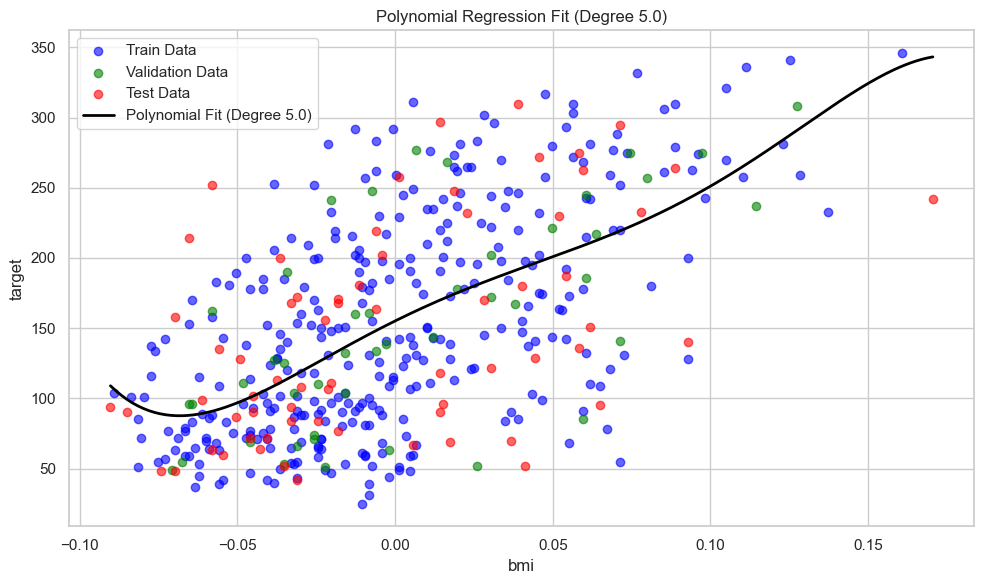

In [14]:
univariate_linear_regression.plot_model_fit(best_degree=best_model["Degree"])

In [15]:
univariate_linear_regression.print_model_equation()

Model Equation: y = 155.15 + 1111.55*bmi - 4659.54*bmi^2 - 20297.41*bmi^3 + 856191.03*bmi^4 - 3393622.46*bmi^5


In [16]:
univariate_linear_regression.predict_for_feature({"bmi":0.056})

Predicted target for bmi=0.0560 is: 205.7679


In [17]:
univariate_linear_regression.print_num_trainable_params()

Trainable parameters (including bias/intercept): 6
Features used in the model:
  - 1
  - bmi
  - bmi^2
  - bmi^3
  - bmi^4
  - bmi^5


We are using 5 trainable params here which is also evident from our equation. The params are:

1 — This is the bias (intercept) term. It’s a constant term added to the model to shift the regression curve up or down.
bmi — The linear term (bmi to the power of 1).
bmi² — The squared term.
bmi³ — The cubic term.
bmi⁴ — The quartic term.
bmi⁵ — The quintic term.

## Part 3: Using other models
I am not dropping any features because from the EDA, we were not confident that any feature is not useful. Also, the dataset is small and dropping features may lead to loss of information.

### Linear Regression model of degree 2

In [18]:
linear_regression_degree_2 = ModelEvaluator(train_df=train_df, test_df=test_df, valid_df=val_df,
                                              model=LinearRegression(),
                                            features=['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
                                            )

linear_regression_degree_2.evaluate_on_train_valid_set(degrees=[2])
linear_regression_degree_2.print_train_valid_results()
linear_regression_degree_2.evaluate_on_test_set(best_degree=2)
linear_regression_degree_2.print_model_equation()
linear_regression_degree_2.predict_for_feature({"bmi":0.056, "bp":0.044,  "s1":0.038, "s2":0.039, "s3":0.040, "s4":0.041, "s5":0.045, "s6":0.025})
linear_regression_degree_2.print_num_trainable_params()

+----+----------+-------------------+-------------+--------------+-----------------+-----------+------------+
|    |   Degree |   Train R-Squared |   Train MAE |   Train MAPE |   Val R-Squared |   Val MAE |   Val MAPE |
|----+----------+-------------------+-------------+--------------+-----------------+-----------+------------|
|  0 |   2.0000 |            0.3548 |     52.2673 |       0.4845 |          0.4492 |   41.7577 |     0.4031 |
+----+----------+-------------------+-------------+--------------+-----------------+-----------+------------+
Model Equation: y = 13.58 + 478.67*bmi + 306.15*bp - 30269.97*s1 + 26485.28*s2 + 11113.97*s3 - 51.86*s4 + 10611.01*s5 + 38.82*s6 + 1233.86*bmi^2 + 2306.33*bmi bp - 10928.17*bmi s1 + 9791.30*bmi s2 + 1728.15*bmi s3 - 1260.86*bmi s4 + 2741.52*bmi s5 + 223.90*bmi s6 + 213.35*bp^2 + 19765.49*bp s1 - 16179.87*bp s2 - 7173.01*bp s3 - 1140.35*bp s4 - 5521.46*bp s5 - 2008.92*bp s6 + 38331.03*s1^2 - 39910.88*s1 s2 - 27039.67*s1 s3 - 17021.98*s1 s4 + 55350

### Linear Regression model of degree 3

In [19]:
linear_regression_degree_3 = ModelEvaluator(train_df=train_df, test_df=test_df, valid_df=val_df,
                                              model=LinearRegression(),
                                            features=['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
                                            )

linear_regression_degree_3.evaluate_on_train_valid_set(degrees=[3])
linear_regression_degree_3.print_train_valid_results()
linear_regression_degree_3.evaluate_on_test_set(best_degree=3)
linear_regression_degree_3.print_model_equation()
linear_regression_degree_3.predict_for_feature({"bmi":0.056, "bp":0.044,  "s1":0.038, "s2":0.039, "s3":0.040, "s4":0.041, "s5":0.045, "s6":0.025})
linear_regression_degree_3.print_num_trainable_params()

+----+----------+-------------------+-------------+--------------+-----------------+-----------+------------+
|    |   Degree |   Train R-Squared |   Train MAE |   Train MAPE |   Val R-Squared |   Val MAE |   Val MAPE |
|----+----------+-------------------+-------------+--------------+-----------------+-----------+------------|
|  0 |   3.0000 |            0.3550 |     52.2234 |       0.4836 |          0.4473 |   41.7410 |     0.4026 |
+----+----------+-------------------+-------------+--------------+-----------------+-----------+------------+
Model Equation: y = -4971.38 + 117830.51*bmi - 114243.17*bp - 1153411.82*s1 + 1096978.08*s2 + 435370.83*s3 - 23298.43*s4 + 453519.24*s5 - 83006.62*s6 + 102.64*bmi^2 + 6999.20*bmi bp + 27048224.83*bmi s1 - 23765663.68*bmi s2 - 10116586.29*bmi s3 - 5323.89*bmi s4 - 8896161.93*bmi s5 - 3603.41*bmi s6 - 3613.10*bp^2 - 26386832.02*bp s1 + 23196014.16*bp s2 + 9857796.79*bp s3 - 14381.39*bp s4 + 8682695.33*bp s5 - 122.96*bp s6 + 4929998.41*s1^2 + 108231

### Decision Tree model of max depth 3

In [21]:
decision_tree_of_depth_3 = ModelEvaluator(train_df=train_df, test_df=test_df, valid_df=val_df,
                                              model=DecisionTreeRegressor(max_depth=3, random_state=42),
                                            features=['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
                                            )

decision_tree_of_depth_3.evaluate_on_train_valid_set(degrees=[3])
decision_tree_of_depth_3.print_train_valid_results()
decision_tree_of_depth_3.evaluate_on_test_set(best_degree=3)
decision_tree_of_depth_3.predict_for_feature({"bmi":0.056, "bp":0.044,  "s1":0.038, "s2":0.039, "s3":0.040, "s4":0.041, "s5":0.045, "s6":0.025})
decision_tree_of_depth_3.print_num_trainable_params()

+----+----------+-------------------+-------------+--------------+-----------------+-----------+------------+
|    |   Degree |   Train R-Squared |   Train MAE |   Train MAPE |   Val R-Squared |   Val MAE |   Val MAPE |
|----+----------+-------------------+-------------+--------------+-----------------+-----------+------------|
|  0 |   3.0000 |            0.4066 |     49.6298 |       0.4529 |          0.4144 |   43.0951 |     0.4161 |
+----+----------+-------------------+-------------+--------------+-----------------+-----------+------------+
Predicted target for bmi=0.0560, bp=0.0440, s1=0.0380, s2=0.0390, s3=0.0400, s4=0.0410, s5=0.0450, s6=0.0250 is: 180.9388
Trainable parameters (including bias/intercept): 165
Features used in the model:
  - 1
  - bmi
  - bp
  - s1
  - s2
  - s3
  - s4
  - s5
  - s6
  - bmi^2
  - bmi bp
  - bmi s1
  - bmi s2
  - bmi s3
  - bmi s4
  - bmi s5
  - bmi s6
  - bp^2
  - bp s1
  - bp s2
  - bp s3
  - bp s4
  - bp s5
  - bp s6
  - s1^2
  - s1 s2
  - s1 s3

### Decision Tree model of max depth 5

In [22]:
decision_tree_of_depth_5 = ModelEvaluator(train_df=train_df, test_df=test_df, valid_df=val_df,
                                              model=DecisionTreeRegressor(max_depth=5, random_state=42),
                                            features=['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
                                            )

decision_tree_of_depth_5.evaluate_on_train_valid_set(degrees=[5])
decision_tree_of_depth_5.print_train_valid_results()
decision_tree_of_depth_5.evaluate_on_test_set(best_degree=5)
decision_tree_of_depth_5.predict_for_feature({"bmi":0.056, "bp":0.044,  "s1":0.038, "s2":0.039, "s3":0.040, "s4":0.041, "s5":0.045, "s6":0.025})
decision_tree_of_depth_5.print_num_trainable_params()

+----+----------+-------------------+-------------+--------------+-----------------+-----------+------------+
|    |   Degree |   Train R-Squared |   Train MAE |   Train MAPE |   Val R-Squared |   Val MAE |   Val MAPE |
|----+----------+-------------------+-------------+--------------+-----------------+-----------+------------|
|  0 |   3.0000 |            0.4724 |     45.6671 |       0.4214 |          0.3670 |   45.0120 |     0.4221 |
+----+----------+-------------------+-------------+--------------+-----------------+-----------+------------+
Predicted target for bmi=0.0560, bp=0.0440, s1=0.0380, s2=0.0390, s3=0.0400, s4=0.0410, s5=0.0450, s6=0.0250 is: 198.3611
Trainable parameters (including bias/intercept): 165
Features used in the model:
  - 1
  - bmi
  - bp
  - s1
  - s2
  - s3
  - s4
  - s5
  - s6
  - bmi^2
  - bmi bp
  - bmi s1
  - bmi s2
  - bmi s3
  - bmi s4
  - bmi s5
  - bmi s6
  - bp^2
  - bp s1
  - bp s2
  - bp s3
  - bp s4
  - bp s5
  - bp s6
  - s1^2
  - s1 s2
  - s1 s3

### kNN model with neighbors 3

In [24]:
kNN_3 = ModelEvaluator(train_df=train_df, test_df=test_df, valid_df=val_df,
                                              model=KNeighborsRegressor(n_neighbors=3),
                                            features=['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
                                            )

kNN_3.evaluate_on_train_valid_set(degrees=[3])
kNN_3.print_train_valid_results()
kNN_3.evaluate_on_test_set(best_degree=3)
kNN_3.predict_for_feature({"bmi":0.056, "bp":0.044,  "s1":0.038, "s2":0.039, "s3":0.040, "s4":0.041, "s5":0.045, "s6":0.025})
kNN_3.print_num_trainable_params()

+----+----------+-------------------+-------------+--------------+-----------------+-----------+------------+
|    |   Degree |   Train R-Squared |   Train MAE |   Train MAPE |   Val R-Squared |   Val MAE |   Val MAPE |
|----+----------+-------------------+-------------+--------------+-----------------+-----------+------------|
|  0 |   3.0000 |            0.5340 |     43.2869 |       0.3961 |          0.2132 |   51.5333 |     0.4860 |
+----+----------+-------------------+-------------+--------------+-----------------+-----------+------------+
Predicted target for bmi=0.0560, bp=0.0440, s1=0.0380, s2=0.0390, s3=0.0400, s4=0.0410, s5=0.0450, s6=0.0250 is: 192.0000
Trainable parameters (including bias/intercept): 165
Features used in the model:
  - 1
  - bmi
  - bp
  - s1
  - s2
  - s3
  - s4
  - s5
  - s6
  - bmi^2
  - bmi bp
  - bmi s1
  - bmi s2
  - bmi s3
  - bmi s4
  - bmi s5
  - bmi s6
  - bp^2
  - bp s1
  - bp s2
  - bp s3
  - bp s4
  - bp s5
  - bp s6
  - s1^2
  - s1 s2
  - s1 s3

### kNN model with neighbors 7

In [25]:
kNN_7 = ModelEvaluator(train_df=train_df, test_df=test_df, valid_df=val_df,
                                              model=KNeighborsRegressor(n_neighbors=7),
                                            features=['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
                                            )

kNN_7.evaluate_on_train_valid_set(degrees=[7])
kNN_7.print_train_valid_results()
kNN_7.evaluate_on_test_set(best_degree=7)
kNN_7.predict_for_feature({"bmi":0.056, "bp":0.044,  "s1":0.038, "s2":0.039, "s3":0.040, "s4":0.041, "s5":0.045, "s6":0.025})
kNN_7.print_num_trainable_params()

+----+----------+-------------------+-------------+--------------+-----------------+-----------+------------+
|    |   Degree |   Train R-Squared |   Train MAE |   Train MAPE |   Val R-Squared |   Val MAE |   Val MAPE |
|----+----------+-------------------+-------------+--------------+-----------------+-----------+------------|
|  0 |   7.0000 |            0.4520 |     47.5459 |       0.4288 |          0.4220 |   45.3810 |     0.4243 |
+----+----------+-------------------+-------------+--------------+-----------------+-----------+------------+
Predicted target for bmi=0.0560, bp=0.0440, s1=0.0380, s2=0.0390, s3=0.0400, s4=0.0410, s5=0.0450, s6=0.0250 is: 188.1429
Trainable parameters (including bias/intercept): 6435
Features used in the model:
  - 1
  - bmi
  - bp
  - s1
  - s2
  - s3
  - s4
  - s5
  - s6
  - bmi^2
  - bmi bp
  - bmi s1
  - bmi s2
  - bmi s3
  - bmi s4
  - bmi s5
  - bmi s6
  - bp^2
  - bp s1
  - bp s2
  - bp s3
  - bp s4
  - bp s5
  - bp s6
  - s1^2
  - s1 s2
  - s1 s